# Tracer une carte en Python

Le notebook propose plusieurs façons de tracer une carte en Python.

Il y a principalement trois façons de tracer une carte. La première est statique avec des modules comme [basemap](https://matplotlib.org/basemap/) ou [cartopy](http://scitools.org.uk/cartopy/) qui sont des surcouches de [matplotlib](https://matplotlib.org/). Le second moyen est une carte animée ou non dans un notebook avec des modules comme [pygal](http://www.pygal.org/en/stable/documentation/types/maps/pygal_maps_world.html), [plotly](https://plot.ly/python/choropleth-maps/). La dernière consiste à insérer des éléments sur une carte en ligne telle que [OpenStreetMap](https://www.openstreetmap.org/) et le module [folium](https://github.com/python-visualization/folium) ou [ipyleaflet](https://github.com/ellisonbg/ipyleaflet).

Il y a souvent trois problèmes avec les cartes. Le premier sont avec les coordonnées. Les plus utilisées sont les coordonnées [longitude / latitude](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_g%C3%A9ographiques). Le problème est que chaque pays a son propre système adapté à sa position géographique. Il faut souvent convertir (voir [lambert93_to_WGPS](https://sdpython.github.io/doc/teachpyx/dev/i_faq.html#geo), [pyproj](https://pyproj4.github.io/pyproj/stable/)). Le second problème est l'ajout de repères géographiques (frontières, fleuves, ...). Certains modules contiennent certaines informations, souvent pour les Etats-Unis. Mais souvent, il faut récupérer ces informations sur les sites open data de chaque pays. La troisième difficulté est qu'on veut tracer des cartes très chargées et cela prend un temps fou pour construire une carte lisible.

In [1]:
%matplotlib inline

## données

In [2]:
from teachpyx.datasets import load_enedis_dataset

df = load_enedis_dataset()
df.head(n=2).T

,0,1
Année,2016,2016
Nom commune,Ponteilla,Varreddes
Code commune,66145,77483
Nom EPCI,CU Perpignan Méditerranée (Pmcu),CA Pays de Meaux
Code EPCI,200027183,247700628
Type EPCI,CU,CA
Nom département,Pyrénées-Orientales,Seine-et-Marne
Code département,66,77
Nom région,Occitanie,Île-de-France
Code région,76,11


## cartopy

[basemap](https://matplotlib.org/basemap/stable/) est l'ancêtre des modules de tracé de cartes sous Python. Ce notebook utilise [cartopy](http://scitools.org.uk/cartopy/). Contrairement à *basemap*, *cartopy* n'installe pas toutes les données dont il a besoin mais télécharge celle dont il a besoin pour tracer une carte. La [projection](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html) indique comment la surface de la terre, sphérique, sera projetée dans le plan. Ensuite, il faut un système de coordonnées pour localiser un point sur la surface. Le plus utilisée est [WGS_84](https://fr.wikipedia.org/wiki/WGS_84) ou longitude, latitude. En France, l'[INSEE](https://www.insee.fr/fr/accueil) utilise aussi le système [Lambert 93](https://epsg.io/2154) ou *EPSG 2154*. Source : [Introduction à la manipulation de données cartographiques](https://medium.com/@_FrancoisM/introduction-%C3%A0-la-manipulation-de-donn%C3%A9es-cartographiques-23b4e38d8f0f). Tout n'est pas parfait dans Cartopy comme ce problème [Create Cartopy projection from pyproj.Proj](https://github.com/SciTools/cartopy/issues/813).

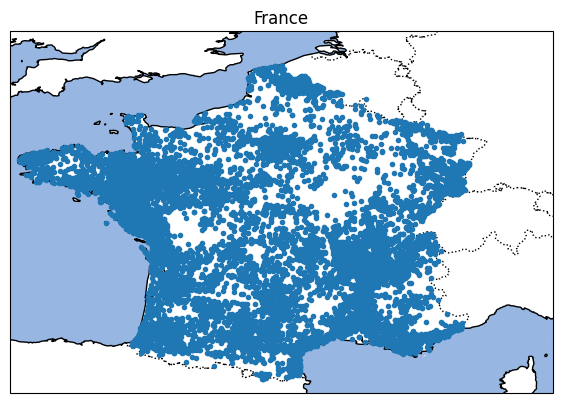

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.plot(df.long, df.lat, ".")
ax.set_title("France");

On peut obtenir une carte un peu plus détaillée mais le module [cartopy](https://scitools.org.uk/cartopy/docs/latest/) télécharge des données pour ce faire. Cela se faire avec l'instruction [with_scale](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html?highlight=with_scale#cartopy.feature.NaturalEarthFeature.with_scale) qui propose trois résolutions :10m, 50m, 110m.

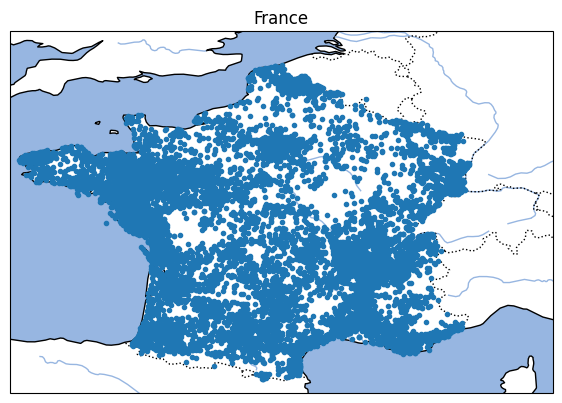

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

ax.add_feature(cfeature.OCEAN.with_scale("50m"))
ax.add_feature(cfeature.COASTLINE.with_scale("50m"))
ax.add_feature(cfeature.RIVERS.with_scale("50m"))
ax.add_feature(cfeature.BORDERS.with_scale("50m"), linestyle=":")
ax.plot(df.long, df.lat, ".")
ax.set_title("France");

On ajoute un système de coordonnées français particulièrement intéressant pour la France. On convertit d'abord longitude, latitude en Lambert 93.

In [5]:
from pyproj import Proj, Transformer

transform = Transformer.from_crs(
    "EPSG:4326", "EPSG:2154"  # longitude / latidude  # Lambert 93
)
transform.transform(-5, 42)

(6634541.621546051, 1633374.3871915536)

In [6]:
transform.transform(10, 52)

(6723037.367738617, 4228679.19768552)

On convertit toutes les coordonnées.

In [7]:
lamb_x, lamb_y = transform.transform(df.long.values, df.lat.values)

Et on dessine deux cartes, la première en longitude, latitude, la seconde en Lambert 93.

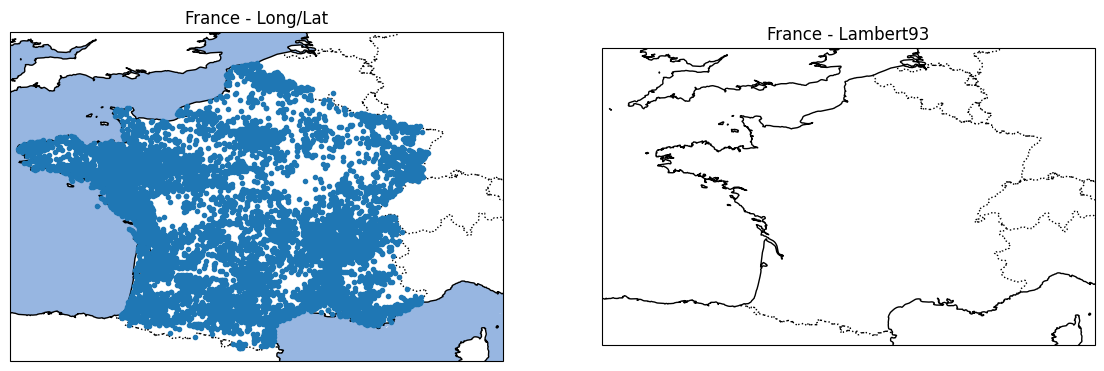

In [8]:
import cartopy.crs as ccrs
from cartopy.crs import CRS, Globe
import cartopy.feature as cfeature
import matplotlib.pyplot as plt


def parse_option_pyproj(s):
    r = s.strip("+").split("=")
    if len(r) == 2:
        if "," in r[1]:
            return r[0], tuple(int(_) for _ in r[1].split(","))
        try:
            return r[0], float(r[1])
        except ValueError:
            return r[0], r[1]
    else:
        return r[0], True


class MyCRS(CRS):
    def __init__(self, proj4_params, globe=None):
        super(MyCRS, self).__init__(proj4_params, globe or Globe())


# voir https://epsg.io/2154, cliquer sur proj.4
proj4_params = (
    "+proj=lcc +lat_1=49 +lat_2=44 +lat_0=46.5 +lon_0=3 +x_0=700000 "
    + "+y_0=6600000 +ellps=GRS80 +units=m +no_defs"
)

# Ne sert à rien si ce n'est à vérifier que le format est correct.
import pyproj

lambert93 = pyproj.Proj(proj4_params)

# Système de coordonnées de cartopy.
proj4_list = [(k, v) for k, v in map(parse_option_pyproj, proj4_params.split())]
crs_lambert93 = MyCRS(proj4_list, globe=None)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.plot(df.long, df.lat, ".")  #
ax.set_title("France - Long/Lat")

df = df.copy()


ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent([36954, 1181938, 6133555, 7233428], crs_lambert93)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.plot(
    lamb_x, lamb_y, ".", transform=crs_lambert93
)  # ne pas oublier transform=crs_lambert93
ax.set_title("France - Lambert93");

## plotly, gmaps, bingmaps

Il faut s'authentifier. Voir [gmaps](https://github.com/pbugnion/gmaps), [bingmaps](http://bharadwajyarlagadda.github.io/bingmaps/index.html), [plotly](https://plot.ly/python/maps/).

## geopandas

[geopandas](http://geopandas.org/) est l'outil qui devient populaire. La partie cartes est accessible via l'[API de geopandas](http://geopandas.org/mapping.html). Il n'inclut moins de données que *basemap*.

In [9]:
import geopandas as gpd
from teachpyx.datasets import get_naturalearth_cities, get_naturalearth_lowres

data = get_naturalearth_cities()
cities = gpd.read_file(data[0])
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.9361)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.2 -26.46667)
4,Luxembourg,POINT (6.13 49.61166)


In [10]:
data = get_naturalearth_lowres()
world = gpd.read_file(data[0])
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


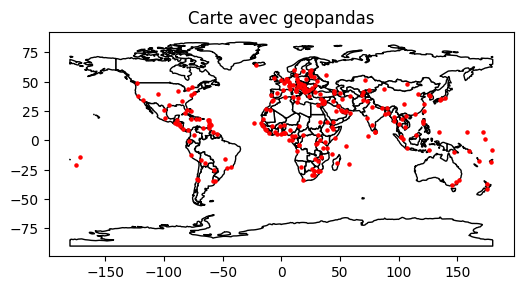

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_aspect("equal")
world.plot(ax=ax, color="white", edgecolor="black")
cities.plot(ax=ax, marker="o", color="red", markersize=5)
ax.set_title("Carte avec geopandas");

On restreint à l'Europe et pas trop loin de la France métropole.

In [12]:
from shapely.geometry import Polygon

europe = world[world.continent == "Europe"].copy()
europe["geometry"] = europe.geometry.intersection(
    Polygon([(-10, 35), (50, 35), (50, 70), (-10, 70)])
)
europe.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
18,144373535.0,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((47.67591 45.64149, 46.68201 44..."
21,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((29.39955 69.15692, 28.59193 69..."
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((6.65823 49.20196, 8.09928 49.0..."
110,10285453.0,Europe,Sweden,SWE,530883,"POLYGON ((11.46827 59.43239, 12.30037 60.11793..."
111,9466856.0,Europe,Belarus,BLR,63080,"POLYGON ((29.22951 55.91834, 29.37157 55.67009..."


In [13]:
from shapely.geometry import Point

points = [Point(lon, lat) for ind, lat, lon in df[["lat", "long"]][:1000].itertuples()]
enedis = gpd.GeoDataFrame(data=dict(geometry=points))
enedis.head()

,geometry
0,POINT (2.82631 42.63236)
1,POINT (2.92725 49.00595)
2,POINT (4.21389 44.46046)
3,POINT (0.97421 47.12047)
4,POINT (5.08532 48.61706)


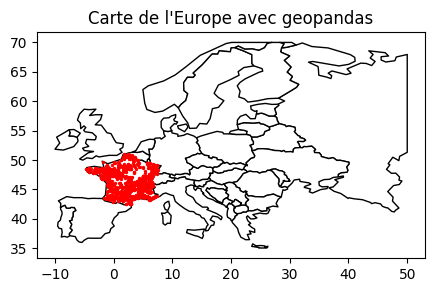

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
europe.plot(ax=ax, color="white", edgecolor="black")
enedis.plot(ax=ax, marker="o", color="red", markersize=2)
ax.set_title("Carte de l'Europe avec geopandas");

## folium

In [15]:
import folium

map_osm = folium.Map(location=[48.85, 2.34])

for ind, lat, lon, com in df[["lat", "long", "Nom commune"]][:50].itertuples():
    map_osm.add_child(
        folium.RegularPolygonMarker(
            location=[lat, lon], popup=com, fill_color="#132b5e", radius=5
        )
    )

map_osm

## cartopy avec les données d'OpenStreetMap

On peut choisir également d'inclure ces détails dans une image fixe si l'image va dans un rapport écrit. On utilise les données d'[OpenStreetMap](http://openstreetmap.fr/) avec un certain [niveau de détail](https://wiki.openstreetmap.org/wiki/Zoom_levels).

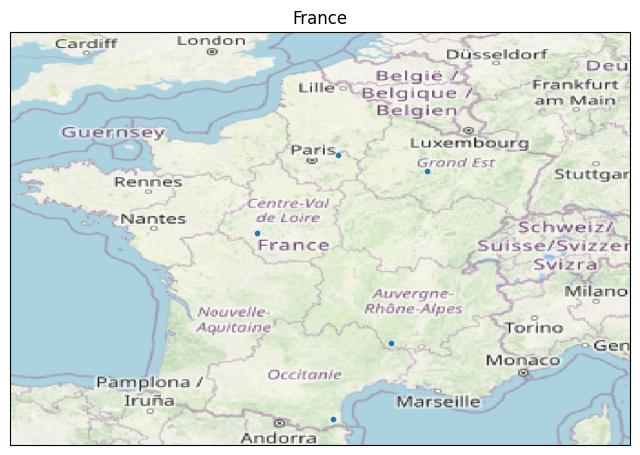

In [16]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import OSM

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-5, 10, 42, 52])

imagery = OSM()
ax.add_image(imagery, 5)
# plus c'est grand, plus c'est précis, plus ça prend du temps

ax.plot(df.long[:5], df.lat[:5], ".")
ax.set_title("France");